In [1]:
# Thread-limiting to avoid OpenBLAS warnings
import os

# Core imports
from PIL import Image
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Parameters
image_size = (32,32)  # small to reduce memory and processing
n_per_class = 100      # small sample per class
dataset_path = "/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset"
random.seed(42)

# Load images (sampled)
def load_images(base_dir, n_samples):
    X, y = [], []
    classes = sorted(os.listdir(base_dir))
    for cls in classes:
        class_path = os.path.join(base_dir, cls)
        files = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
        sampled = random.sample(files, min(len(files), n_samples))
        for fname in sampled:
            try:
                img = Image.open(os.path.join(class_path, fname)).convert("RGB").resize(image_size)
                X.append(np.array(img).flatten() / 255.0)
                y.append(cls)
            except Exception as e:
                print(f"Error with {fname}: {e}")
    return np.array(X), np.array(y)

# Load train/test
X_train, y_train = load_images(os.path.join(dataset_path, "train"), n_per_class)
X_test, y_test = load_images(os.path.join(dataset_path, "test"), n_per_class)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



✅ Accuracy: 0.5516666666666666
Classification Report:
                precision    recall  f1-score   support

  freshapples       0.46      0.68      0.55       100
  freshbanana       0.70      0.79      0.74       100
 freshoranges       0.62      0.65      0.63       100
 rottenapples       0.38      0.45      0.41       100
 rottenbanana       0.93      0.38      0.54       100
rottenoranges       0.49      0.36      0.41       100

     accuracy                           0.55       600
    macro avg       0.59      0.55      0.55       600
 weighted avg       0.59      0.55      0.55       600

Confusion Matrix:
[[68  3  7 15  0  7]
 [ 9 79  4  1  1  6]
 [ 7  6 65 16  1  5]
 [32  2 12 45  0  9]
 [10 17  0 24 38 11]
 [21  6 17 19  1 36]]


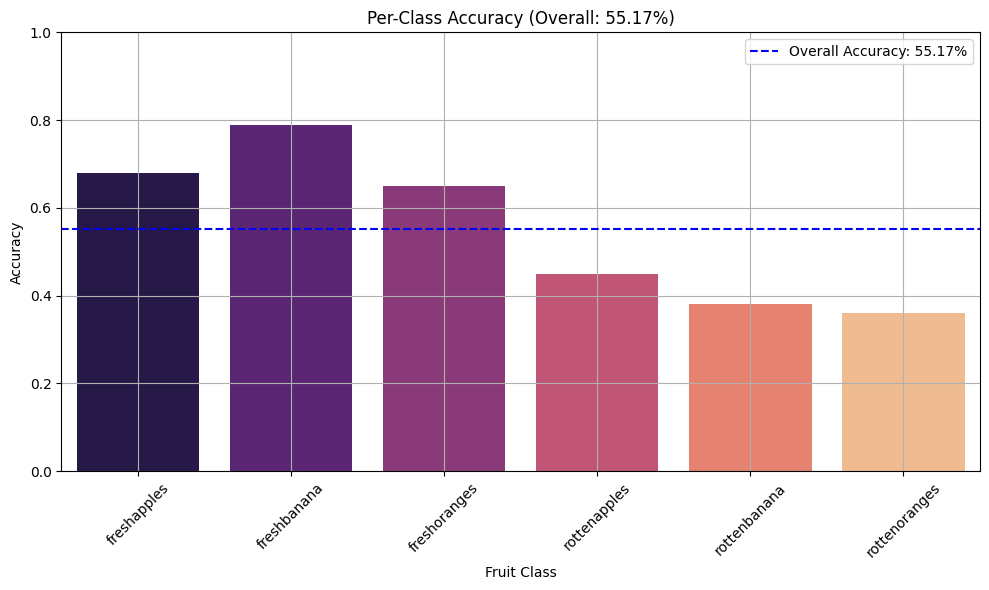

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion matrix and class accuracies
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
class_accuracies = cm.diagonal() / cm.sum(axis=1)

# Overall accuracy
overall_acc = accuracy_score(y_test, y_pred)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=knn.classes_, y=class_accuracies, palette="magma")
plt.axhline(overall_acc, color='blue', linestyle='--', label=f'Overall Accuracy: {overall_acc:.2%}')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Fruit Class")
plt.title(f"Per-Class Accuracy (Overall: {overall_acc:.2%})")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
